In [59]:
import pandas as pd
import numpy as np
import matplotlib as plt
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline

df = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas

In [2]:
#Let's save our dataframe to Excel
df.to_excel('week3TitanicDataFrame.xlsx')

In [3]:
#And read it back in just to make sure it worked
df=pd.read_excel('week3TitanicDataFrame.xlsx')

In [4]:
#Let's take a look at the first 5 rows of the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
#Let's check out some descriptive statistics of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Let's look at the median for Age
df['Age'].median()

28.0

In [7]:
#let's check out the values included in the table for sex
df['Sex'].unique()

array([u'male', u'female'], dtype=object)

In [8]:
#What if we wanted to subset by just males
df[df['Sex'] == 'male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S


In [9]:
#How many males are there?
len(df[df['Sex'] == 'male'])

577

In [10]:
#Why not use size?
df[df['Sex'] == 'male'].size

6924

In [11]:
#One of these must be wrong, how many columns are there?
len(df.columns)

12

In [12]:
#Let's see if size matches the length * # of columns
12*577

6924

In [13]:
#What if we want the proportion of each gender in the data set?
df.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

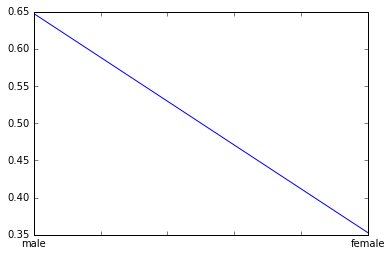

In [14]:
#Well that's great, but what if we want to plot it?
df.Sex.value_counts(normalize=True).plot()

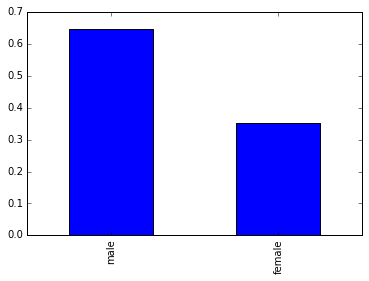

In [15]:
#Well, that's okay, but what about a different kind of plot?
df.Sex.value_counts(normalize=True).plot(kind='bar')

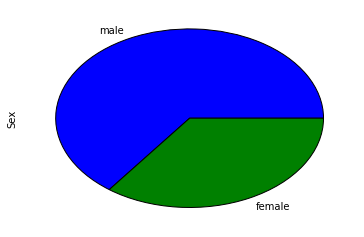

In [16]:
df.Sex.value_counts(normalize=True).plot(kind='pie')

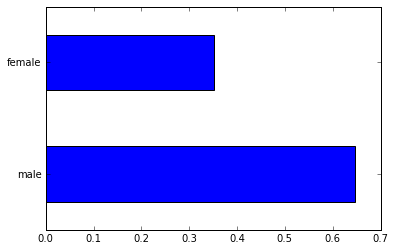

In [17]:
df.Sex.value_counts(normalize=True).plot(kind='barh')

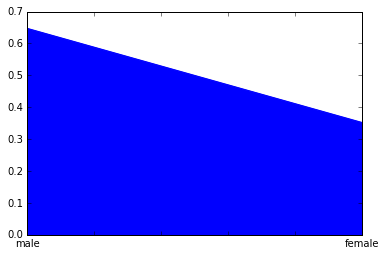

In [18]:
df.Sex.value_counts(normalize=True).plot(kind='area')

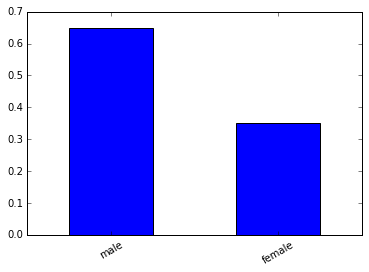

In [19]:
#I like that original bar plot, but the labels aren't great, let's rotate them
df.Sex.value_counts(normalize=True).plot(kind='bar', rot=30)

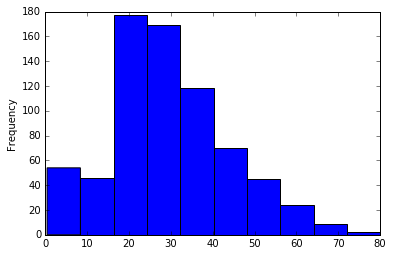

In [20]:
#Let's plot a histogram of age
df['Age'].plot(kind='hist')

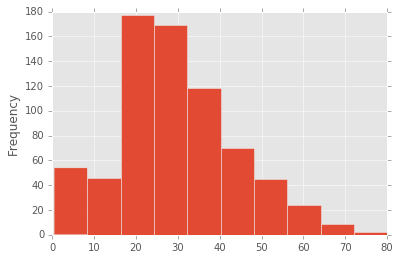

In [21]:
#That's kind of ugly, let's swtich to the ggplot style and try again
plt.style.use('ggplot')
df['Age'].plot(kind='hist')

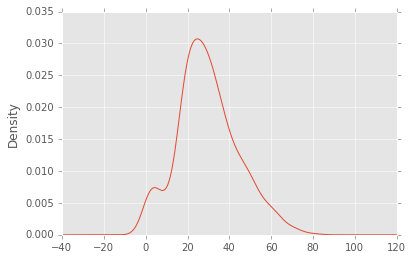

In [22]:
#What about a density plot?
df['Age'].plot(kind='kde')

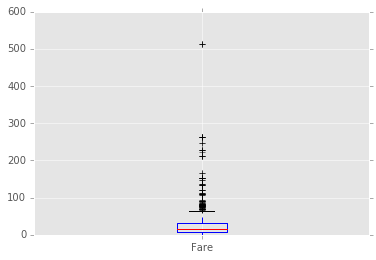

In [23]:
#That's better, now let's try plotting a boxplot of the fares
df['Fare'].plot(kind='box')

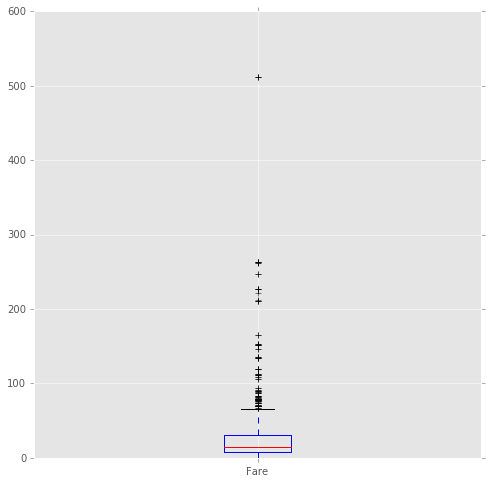

In [24]:
#That's a bit hard to see, let's increase the size
df['Fare'].plot(kind='box', figsize=(8,8))

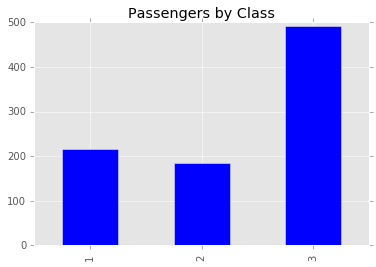

In [25]:
#What about a breakdown of the number of passengers by class?
df['Pclass'].value_counts().sort_index().plot(kind='bar', title='Passengers by Class')

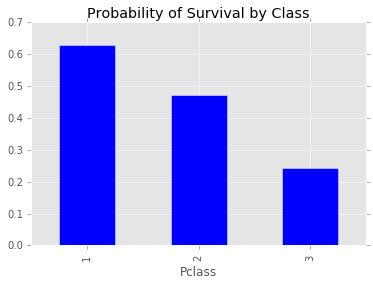

In [28]:
#What about a the probability of survival by class?
(df.groupby('Pclass').Survived.sum()/df.groupby('Pclass').Survived.count()).plot(kind='bar',title='Probability of Survival by Class')

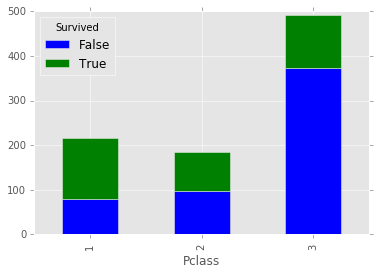

In [29]:
#Let's plot both at once
(pd.crosstab([df.Pclass], df.Survived.astype(bool))).plot(kind='bar',stacked=True)

In [30]:
#Let's check out missing data
sum(df['Cabin'].isnull())

687

In [31]:
#Let's check out Ticket
df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [32]:
#Let's drop ticket and cabin
df = df.drop(['Ticket','Cabin'], axis=1) 

In [33]:
#Let's fill in missing values for Age with the mean age
meanAge = np.mean(df.Age)
df.Age = df.Age.fillna(meanAge)

In [34]:
#Let's restore our data frame and drop those columns again, the mean probably 
# isn't a great way to imput missing data
df = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas
df = df.drop(['Ticket','Cabin'], axis=1) 

In [35]:
#Create a function to strip off salutations in names
def name_extract(word):
 return word.split(',')[1].split('.')[0].strip()

In [37]:
#Create a data frame in which we've extracted those as Salutation
df2 = pd.DataFrame({'Salutation':df['Name'].apply(name_extract)})

In [38]:
#Let's merge our data frames and take a look
df = pd.merge(df, df2, left_index = True, right_index = True) # merges on index
temp1 = df.groupby('Salutation').PassengerId.count()
print temp1

Salutation
Capt              1
Col               2
Don               1
Dr                7
Jonkheer          1
Lady              1
Major             2
Master           40
Miss            182
Mlle              2
Mme               1
Mr              517
Mrs             125
Ms                1
Rev               6
Sir               1
the Countess      1
Name: PassengerId, dtype: int64


In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr


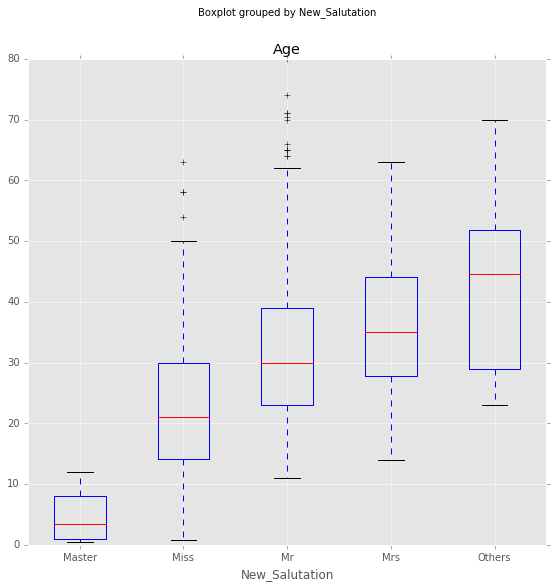

In [42]:
#Let's group these salutations, and then merge the new salutations with our original dataframe
def group_salutation(old_salutation):
 if old_salutation == 'Mr':
    return('Mr')
 else:
    if old_salutation == 'Mrs':
       return('Mrs')
    else:
       if old_salutation == 'Master':
          return('Master')
       else: 
          if old_salutation == 'Miss':
             return('Miss')
          else:
             return('Others')
df3 = pd.DataFrame({'New_Salutation':df['Salutation'].apply(group_salutation)})
df = pd.merge(df, df3, left_index = True, right_index = True)
temp1 = df3.groupby('New_Salutation').count()
temp1
df.boxplot(column='Age', by = 'New_Salutation', figsize=(9,9))

In [43]:
#Let's create a pivot table, and imput missing ages based on the 
# median based on sex, class, and salutation
table = df.pivot_table(values='Age', index=['New_Salutation'], columns=['Pclass', 'Sex'], aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table[x['Pclass']][x['Sex']][x['New_Salutation']]
# Replace missing values
df['Age'].fillna(df[df['Age'].isnull()].apply(fage, axis=1), inplace=True)

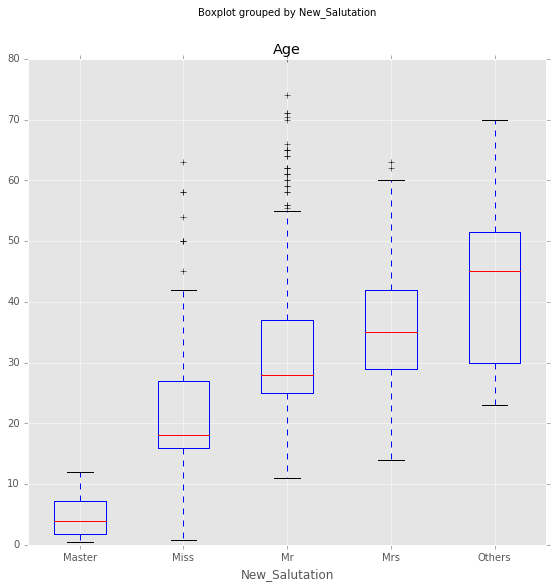

In [44]:
#Let's plot again
df.boxplot(column='Age', by = 'New_Salutation', figsize=(9,9))

In [45]:
#Let's save our updated dataframe to Excel
df.to_excel('week3TitanicDataFrameUpdated.xlsx')

In [46]:
#And read it back in just to make sure it worked
dfExcelTest = pd.read_excel('week3TitanicDataFrameUpdated.xlsx')

In [47]:
#Take a look
dfExcelTest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,New_Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr,Mr


It works!!!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42dfa6ad90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f42d718a650>]], dtype=object)

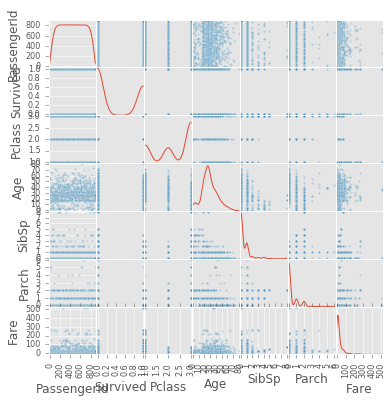

In [50]:
#Lets check out a scatter matrix of our data
pd.tools.plotting.scatter_matrix(df, alpha=0.3, figsize=(6,6), diagonal='kde')

In [51]:
#Lets check out age and fares by passenger class, maybe younger individuals can't afford better rooms
print 'Fare Breakdown by Passenger Class \n\n', df.pivot_table(values = 'Fare', columns = 'Pclass'), '\n'
print 'Age Breakdown by Passenger Class \n\n', df.pivot_table(values = 'Age', columns = 'Pclass')

Fare Breakdown by Passenger Class 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64 

Age Breakdown by Passenger Class 

Pclass
1    38.529722
2    29.868641
3    24.753401
Name: Age, dtype: float64


In [58]:
#Does age differ significantly by passenger class?
print sm.stats.ttest_ind(df.Age[(df.Pclass == 1) & (df.Age.notnull())], df.Age[(df.Pclass == 2) & (df.Age.notnull())],usevar='unequal')
print sm.stats.ttest_ind(df.Age[(df.Pclass == 2) & (df.Age.notnull())], df.Age[(df.Pclass == 3) & (df.Age.notnull())],usevar='unequal')
print sm.stats.ttest_ind(df.Age[(df.Pclass == 1) & (df.Age.notnull())], df.Age[(df.Pclass == 3) & (df.Age.notnull())],usevar='unequal')

(6.311085235182639, 7.5442466548509011e-10, 389.60803712390492)
(4.5767784990591034, 7.1333611957226742e-06, 277.23759698654817)
(12.988122912033861, 1.3361616189088172e-31, 340.08656892423789)


In [60]:
#Lets make a R style equation
y, X = dmatrices("Survived~Age+Sex+Pclass+Fare", data = df)

In [61]:
#Fit a logit model
logitMod = sm.Logit(y,X)
logit_res = logitMod.fit()

Optimization terminated successfully.
         Current function value: 0.453242
         Iterations 6


In [62]:
#Check the results
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Tue, 17 May 2016   Pseudo R-squ.:                  0.3290
Time:                        13:44:10   Log-Likelihood:                -323.61
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 2.020e-67
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       4.9880      0.572      8.717      0.000         3.867     6.110
Sex[T.male]    -2.5182      0.208    -12.115      0.000        -2.926    -2.111
Age            -0.0367      0.008     -4.780      0.000        -0.052    -0.022
Pclass         -1.2697      0.159     -8.005      0.000        -1.581    -0.959
Fare            0.0005      0.002      0.246      0.805        -0.004     0.005
===============================================================================
"""

In [63]:
#Look at the marginal effects
margeff = logit_res.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
===============================================================================
                 dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Sex[T.male]    -0.3667      0.016    -22.391      0.000        -0.399    -0.335
Age            -0.0053      0.001     -5.036      0.000        -0.007    -0.003
Pclass         -0.1849      0.020     -9.312      0.000        -0.224    -0.146
Fare         7.825e-05      0.000      0.246      0.805        -0.001     0.001
===============================================================================
"""

In [64]:
#Lets try this with all the interactions
y, X = dmatrices("Survived~Age*Sex*Pclass*Fare", data = df)

In [65]:
#Fit a logit model
logitMod = sm.Logit(y,X)
logit_res = logitMod.fit()

Optimization terminated successfully.
         Current function value: 0.419103
         Iterations 9


In [66]:
#Check the results
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      698
Method:                           MLE   Df Model:                           15
Date:                Tue, 17 May 2016   Pseudo R-squ.:                  0.3795
Time:                        13:44:58   Log-Likelihood:                -299.24
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 9.240e-69
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      13.3119      3.686      3.611      0.000         6.087    20.537
Sex[T.male]                   -12.0347      3.914     -3.075      0.002       -19.705    -4.364
Age                            -0.1994      0.107     -1.864      0.062        -0.409     0.010
Age:Sex[T.male]                 0.1791      0.113      1.586      0.113        -0.042     0.400
Pclass                         -3.6159      1.307     -2.767      0.006        -6.177    -1.054
Sex[T.male]:Pclass              3.3458      1.435      2.331      0.020         0.532     6.159
Age:Pclass                      0.0435      0.041      1.062      0.288        -0.037     0.124
Age:Sex[T.male]:Pclass         -0.0677      0.046     -1.486      0.137        -0.157     0.022
Fare                           -0.0426      0.039     -1.078      0.281        -0.120     0.035
Sex[T.male]:Fare                0.0642      0.045      1.432      0.152        -0.024     0.152
Age:Fare                        0.0027      0.002      1.504      0.133        -0.001     0.006
Age:Sex[T.male]:Fare           -0.0034      0.002     -1.741      0.082        -0.007     0.000
Pclass:Fare                    -0.0252      0.027     -0.950      0.342        -0.077     0.027
Sex[T.male]:Pclass:Fare         0.0020      0.032      0.062      0.950        -0.060     0.064
Age:Pclass:Fare                -0.0001      0.001     -0.139      0.889        -0.002     0.002
Age:Sex[T.male]:Pclass:Fare     0.0010      0.001      0.776      0.438        -0.002     0.003
===============================================================================================
"""

In [67]:
#Look at the marginal effects
margeff = logit_res.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:               Survived
Method:                          dydx
At:                           overall
===============================================================================================
                                 dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Sex[T.male]                    -1.6302      0.523     -3.118      0.002        -2.655    -0.605
Age                            -0.0270      0.014     -1.870      0.061        -0.055     0.001
Age:Sex[T.male]                 0.0243      0.015      1.587      0.112        -0.006     0.054
Pclass                         -0.4898      0.175     -2.793      0.005        -0.833    -0.146
Sex[T.male]:Pclass              0.4532      0.194      2.340      0.019         0.074     0.833
Age:Pclass                      0.0059      0.006      1.062      0.288        -0.005     0.017
Age:Sex[T.male]:Pclass         -0.0092      0.006     -1.485      0.138        -0.021     0.003
Fare                           -0.0058      0.005     -1.078      0.281        -0.016     0.005
Sex[T.male]:Fare                0.0087      0.006      1.432      0.152        -0.003     0.021
Age:Fare                        0.0004      0.000      1.506      0.132        -0.000     0.001
Age:Sex[T.male]:Fare           -0.0005      0.000     -1.743      0.081        -0.001  5.75e-05
Pclass:Fare                    -0.0034      0.004     -0.955      0.340        -0.010     0.004
Sex[T.male]:Pclass:Fare         0.0003      0.004      0.062      0.950        -0.008     0.009
Age:Pclass:Fare             -1.941e-05      0.000     -0.139      0.889        -0.000     0.000
Age:Sex[T.male]:Pclass:Fare     0.0001      0.000      0.775      0.438        -0.000     0.000
===============================================================================================
"""